In [1]:
#import libraries
import requests
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from cmath import nan
import tabula as tb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 
import json

# SCRAPPING

In [112]:
driver_path = "E:/chromedriver.exe"
option = webdriver.ChromeOptions()
driver = webdriver.Chrome(executable_path=driver_path, options=option)
driver.get('http://cms.ndma.gov.pk/page/sitrep-2022')
i=0
for item in driver.find_elements(By.CLASS_NAME,"service-item.col-xs-12.col-sm-9.wow.zoomIn.shaded-container"):
    i=item.get_attribute("innerHTML")

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\1540947874.py:3: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



In [113]:
lis=[]
date=[]
for item in range(0,len(i.split())):
    if i.split()[item] == "September" or i.split()[item] == "August":
        if i.split()[item] == "August" and i.split()[item-1] == "5":
            lis.append(i.split()[item-1])
            date.append(i.split()[item-1]+" "+i.split()[item])
            break
        lis.append(i.split()[item-1])
        date.append(i.split()[item-1]+" "+i.split()[item])

In [114]:
lis1=[]
for ref in i.split():
    if "href=" in ref:
        lis1.append(ref[6:-1])

In [115]:
df6=pd.DataFrame(columns=["Province","Deaths(M)","Deaths(F)","Deaths(C)","Deaths(T)","Injured(M)","Injured(F)","Injured(C)","Injured(T)"])
df7=pd.DataFrame(columns=["Province","Roads","Bridges","Shops","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"])
for doc in range(0,len(lis)):
    file = lis1[doc]
    tables = tb.read_pdf(file, pages="all")

    try:
        df=tables[0].copy()
        df = df.iloc[:,:-1]
        df.columns =["Province","Deaths(M)","Deaths(F)","Deaths(C)","Deaths(T)","Injured(M)","Injured(F)","Injured(C)","Injured(T)"]
        df.dropna(axis = 0,how='all',inplace = True)
        for i in range(0,len(df)):
            if pd.isnull(df.iloc[i,0]):
                df.iloc[i,0]=df.iloc[i-1,0]
        df['Date']=date[doc]
        df['Cumulative?']='No'
    except:
        df=pd.DataFrame(columns =["Province","Deaths(M)","Deaths(F)","Deaths(C)","Deaths(T)","Injured(M)","Injured(F)","Injured(C)","Injured(T)"])
        df['Date']=date[doc]
        df['Cumulative?']='Yes'

    try:
        df1=tables[1].copy()
        df1=df1.iloc[:,:]
        df1.dropna(axis = 0,how='all',inplace = True)
        df1.dropna(axis = 1,how='all',inplace = True)
        df1.columns =["Province","Deaths(M)","Deaths(F)","Deaths(C)","Deaths(T)","Injured(M)","Injured(F)","Injured(C)","Injured(T)"]
        for i in range(0,len(df1)):
            if pd.isnull(df1.iloc[i,0]):
                df1.iloc[i,0]=df1.iloc[i-1,0]
        df1['Date']=date[doc]
        df1['Cumulative?']='Yes'
    except:
        df1=pd.DataFrame(columns =["Province","Deaths(M)","Deaths(F)","Deaths(C)","Deaths(T)","Injured(M)","Injured(F)","Injured(C)","Injured(T)"])
        df1['Date']=date[doc]
        df1['Cumulative?']='Yes'

    try:
        df2=tables[2].copy()
        df2=df2.iloc[:,:]
        df2.columns =["Province","Roads","Bridges","Shops","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"]
        df2.dropna(axis = 0,how='all',inplace = True)
        for i in range(0,len(df2)):
            if pd.isnull(df2.iloc[i,0]):
                df2.iloc[i,0]=df2.iloc[i-1,0]
        df2['Date']=date[doc]
        df2['Cumulative?']='No'
    except:
        try:
            df2=tables[2].copy()
            df2=df2.iloc[:,:]
            df2.columns =["Province","Roads","Bridges","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"]
            df2.dropna(axis = 0,how='all',inplace = True)
            for i in range(0,len(df2)):
                if pd.isnull(df2.iloc[i,0]):
                    df2.iloc[i,0]=df2.iloc[i-1,0]
            df2['Date']=date[doc]
            df2['Cumulative?']='No'
        except:
            df2=pd.DataFrame(columns =["Province","Roads","Bridges","Shops","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"])
            df2['Date']=date[doc]
            df2['Cumulative?']='No'
    try:
        df3=tables[3].copy()
        df3=df3.iloc[:,:]
        df3.columns =["Province","Roads","Bridges","Shops","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"]
        df3.dropna(axis = 0,how='all',inplace = True)
        for i in range(0,len(df3)):
            if pd.isnull(df3.iloc[i,0]):
                df3.iloc[i,0]=df3.iloc[i-1,0]
        df3['Date']=date[doc]
        df3['Cumulative?']='Yes'
    except:
        try:
            df3=tables[3].copy()
            df3=df3.iloc[:,:]
            df3.columns =["Province","Roads","Bridges","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"]
            df3.dropna(axis = 0,how='all',inplace = True)
            for i in range(0,len(df3)):
                if pd.isnull(df3.iloc[i,0]):
                    df3.iloc[i,0]=df3.iloc[i-1,0]
            df3['Date']=date[doc]
            df3['Cumulative?']='Yes'
        except:
            df3=pd.DataFrame(columns =["Province","Roads","Bridges","Shops","Houses(PD)","Houses(FD)","Houses(Total)","Livestock"])
            df3['Date']=date[doc]
            df3['Cumulative?']='Yes'

    df4=df.append(df1)
    df5=df2.append(df3)
    df6=df6.append(df4)
    df7=df7.append(df5)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\3673080674.py:89: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\3673080674.py:90: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\3673080674.py:91: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\3673080674.py:92: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\3673080674.py:89: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [116]:
df6

,Province,Deaths(M),Deaths(F),Deaths(C),Deaths(T),Injured(M),Injured(F),Injured(C),Injured(T),Date,Cumulative?
0,Total,M,F,C,T,M,F,C,T,16 September,No
1,AJ&K,0,NaN,0,0,NaN,NaN,NaN,0,16 September,No
2,Balochistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16 September,No
3,Balochistan,2,3,5,NaN,NaN,NaN,NaN,NaN,16 September,No
5,GB,NaN,NaN,NaN,0,1,NaN,NaN,1,16 September,No
...,...,...,...,...,...,...,...,...,...,...,...
4,ICT,1,0,0,1,0,0,0,0,5 August,Yes
5,KP,30,21,54,105,34,43,44,121,5 August,Yes
6,Punjab,63,21,35,119,158,104,39,301,5 August,Yes
7,Sindh,52,10,60,122,41,21,49,111,5 August,Yes


In [117]:
df7

,Province,Roads,Bridges,Shops,Houses(PD),Houses(FD),Houses(Total),Livestock,Date,Cumulative?
0,TOTAL,NaN,Bridges,NaN,NaN,NaN,NaN,NaN,17 September,No
1,/Region,(km),s,NaN,NaN,NaN,NaN,NaN,17 September,No
3,/Region,NaN,PD,NaN,FD,Total,NaN,NaN,17 September,No
4,AJ&K,0,0,NaN,223,325,548,792,17 September,No
5,Balochistan,1850,22,NaN,46914*,19083*,65997*,500000^,17 September,No
...,...,...,...,...,...,...,...,...,...,...
4,Punjab,0.0,0.0,0.0,2,0,2,0.0,5 August,No
5,Sindh,235.4,1.0,0.0,445,120,565,4.0,5 August,No
6,GB,0.0,0.0,0.0,0,0,0,0.0,5 August,No
7,AJ&K,0.0,0.0,0.0,0,0,0,0.0,5 August,No


# DATA CLEANING

In [118]:
df6['Province'].unique()

array(['Total', 'AJ&K', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab',
       'Sindh', 'Province', '/Region', '678', '658', 'alochistan', '623',
       '1', '617', '616', '5', 'Province\r/Region', '3', '526', '4^',
       '31', '14', 'M', '10', '7', '6', 'erroneousl'], dtype=object)

In [119]:
province=['AJ&K', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab','Sindh','alochistan']
df6_filtered = df6[df6['Province'].isin(province)]
df6_filtered['Province'] = df6_filtered['Province'].replace({'alochistan':'Balochistan'})

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\53364057.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [133]:
df6_filtered['Province'].astype('string')
df6_filtered['Deaths(M)']=pd.to_numeric(df6_filtered['Deaths(M)'],errors='coerce')
df6_filtered['Deaths(F)']=pd.to_numeric(df6_filtered['Deaths(F)'],errors='coerce')
df6_filtered['Deaths(C)']=pd.to_numeric(df6_filtered['Deaths(C)'],errors='coerce')
df6_filtered['Deaths(T)']=pd.to_numeric(df6_filtered['Deaths(T)'],errors='coerce')
df6_filtered['Injured(M)']=pd.to_numeric(df6_filtered['Injured(M)'],errors='coerce')
df6_filtered['Injured(F)']=pd.to_numeric(df6_filtered['Injured(F)'],errors='coerce')
df6_filtered['Injured(C)']=pd.to_numeric(df6_filtered['Injured(C)'],errors='coerce')
df6_filtered['Injured(T)']=pd.to_numeric(df6_filtered['Injured(T)'],errors='coerce')
df6_filtered['Date'].astype('string')
df6_filtered['Cumulative?'].astype('string')
df6_filtered.dropna(thresh=10,inplace=True) 
df6_filtered.fillna(0,inplace=True) 
df6_filtered

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\1143041997.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\1143041997.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\1143041997.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Province,Deaths(M),Deaths(F),Deaths(C),Deaths(T),Injured(M),Injured(F),Injured(C),Injured(T),Date,Cumulative?
10,Sindh,12.0,7.0,13.0,32.0,31.0,44.0,16.0,91.0,16 September,No
4,AJ&K,31.0,17.0,0.0,48.0,15.0,9.0,0.0,24.0,16 September,Yes
11,ICT,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16 September,Yes
12,KP,149.0,41.0,116.0,306.0,156.0,79.0,134.0,369.0,16 September,Yes
13,Punjab,94.0,47.0,50.0,191.0,2173.0,1113.0,572.0,3858.0,16 September,Yes
...,...,...,...,...,...,...,...,...,...,...,...
3,GB,1.0,4.0,3.0,8.0,3.0,0.0,0.0,3.0,5 August,Yes
4,ICT,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5 August,Yes
5,KP,30.0,21.0,54.0,105.0,34.0,43.0,44.0,121.0,5 August,Yes
6,Punjab,63.0,21.0,35.0,119.0,158.0,104.0,39.0,301.0,5 August,Yes


In [134]:
dic={
    'August':'07',
    'September':'08',

}
for i in range(len(df6_filtered)):
        x=df6_filtered.iloc[i,9]
        y=x.split()
        if len(y[0]) == 1:
            df6_filtered.iloc[i,9]='2022'+dic[y[1]]+"0"+y[0]
        else:
            df6_filtered.iloc[i,9]='2022'+dic[y[1]]+y[0]

In [135]:
df6_filtered['Date'] = pd.to_datetime(df6_filtered['Date'], format='%Y%m%d')
df6_filtered

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\918995238.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Province,Deaths(M),Deaths(F),Deaths(C),Deaths(T),Injured(M),Injured(F),Injured(C),Injured(T),Date,Cumulative?
10,Sindh,12.0,7.0,13.0,32.0,31.0,44.0,16.0,91.0,2022-08-16,No
4,AJ&K,31.0,17.0,0.0,48.0,15.0,9.0,0.0,24.0,2022-08-16,Yes
11,ICT,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-08-16,Yes
12,KP,149.0,41.0,116.0,306.0,156.0,79.0,134.0,369.0,2022-08-16,Yes
13,Punjab,94.0,47.0,50.0,191.0,2173.0,1113.0,572.0,3858.0,2022-08-16,Yes
...,...,...,...,...,...,...,...,...,...,...,...
3,GB,1.0,4.0,3.0,8.0,3.0,0.0,0.0,3.0,2022-07-05,Yes
4,ICT,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-07-05,Yes
5,KP,30.0,21.0,54.0,105.0,34.0,43.0,44.0,121.0,2022-07-05,Yes
6,Punjab,63.0,21.0,35.0,119.0,158.0,104.0,39.0,301.0,2022-07-05,Yes


In [136]:
df7['Province'].unique()

array(['TOTAL', '/Region', 'AJ&K', 'Balochistan', 'GB', 'ICT', 'KP',
       'Punjab', 'Sindh', '50', 'Sindh*', '26992', '300', 'Province',
       '13383', nan, 'KP  (&)', 'Khyber', 'Pakhtunkhwa',
       '*Khyber\rPakhtunkhwa', 'Khyber\rPakhtunkhwa'], dtype=object)

In [144]:
province=['AJ&K', 'Balochistan', 'GB', 'ICT', 'KP', 'Punjab','Sindh','Sindh*','Khyber', 'Pakhtunkhwa','*Khyber\rPakhtunkhwa','Khyber\rPakhtunkhwa','KP  (&)']
df7_filtered = df7[df7['Province'].isin(province)]

df7_filtered['Province'] = df7_filtered['Province'].replace({'Sindh*':'Sindh'})
df7_filtered['Province'] = df7_filtered['Province'].replace({'Khyber':'KP'})
df7_filtered['Province'] = df7_filtered['Province'].replace({'*Khyber\rPakhtunkhwa':'KP'})
df7_filtered['Province'] = df7_filtered['Province'].replace({'Pakhtunkhwa':'KP'})
df7_filtered['Province'] = df7_filtered['Province'].replace({'Khyber\rPakhtunkhwa':'KP'})
df7_filtered['Province'] = df7_filtered['Province'].replace({'KP  (&)':'KP'})

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\4243742660.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\4243742660.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\4243742660.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [145]:
df7_filtered['Province'].astype('string')
df7_filtered['Roads']=pd.to_numeric(df7_filtered['Roads'],errors='coerce')
df7_filtered['Bridges']=pd.to_numeric(df7_filtered['Bridges'],errors='coerce')
df7_filtered['Shops']=pd.to_numeric(df7_filtered['Shops'],errors='coerce')
df7_filtered['Houses(PD)']=pd.to_numeric(df7_filtered['Houses(PD)'],errors='coerce')
df7_filtered['Houses(FD)']=pd.to_numeric(df7_filtered['Houses(FD)'],errors='coerce')
df7_filtered['Houses(Total)']=pd.to_numeric(df7_filtered['Houses(Total)'],errors='coerce')
df7_filtered['Livestock']=pd.to_numeric(df7_filtered['Livestock'],errors='coerce')
df7_filtered['Date'].astype('string')
df7_filtered['Cumulative?'].astype('string')
df7_filtered.dropna(thresh=10,inplace=True) 
df7_filtered.fillna(0,inplace=True) 
df7_filtered

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\2886154517.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\2886154517.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\2886154517.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Province,Roads,Bridges,Shops,Houses(PD),Houses(FD),Houses(Total),Livestock,Date,Cumulative?
2,AJ&K,0.0,0.0,20.0,200.0,283.0,483.0,790.0,1 September,Yes
4,GB,16.0,65.0,8.0,681.0,546.0,1227.0,0.0,1 September,Yes
5,ICT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1 September,Yes
6,KP,1589.0,84.0,0.0,44769.0,31931.0,76700.0,9454.0,1 September,Yes
7,Punjab,130.0,16.0,100.0,29730.0,16590.0,46320.0,205106.0,1 September,Yes
...,...,...,...,...,...,...,...,...,...,...
3,KP,0.0,0.0,0.0,267.0,4.0,271.0,23.0,5 August,No
4,Punjab,0.0,0.0,0.0,2.0,0.0,2.0,0.0,5 August,No
5,Sindh,235.4,1.0,0.0,445.0,120.0,565.0,4.0,5 August,No
6,GB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5 August,No


In [146]:
dic={
    'August':'07',
    'September':'08',

}
for i in range(len(df7_filtered)):
        x=df7_filtered.iloc[i,8]
        y=x.split()
        if len(y[0]) == 1:
            df7_filtered.iloc[i,8]='2022'+dic[y[1]]+"0"+y[0]
        else:
            df7_filtered.iloc[i,8]='2022'+dic[y[1]]+y[0]

In [148]:
df7_filtered['Date'] = pd.to_datetime(df7_filtered['Date'], format='%Y%m%d')
df7_filtered

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11968\3964357174.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Province,Roads,Bridges,Shops,Houses(PD),Houses(FD),Houses(Total),Livestock,Date,Cumulative?
2,AJ&K,0.0,0.0,20.0,200.0,283.0,483.0,790.0,2022-08-01,Yes
4,GB,16.0,65.0,8.0,681.0,546.0,1227.0,0.0,2022-08-01,Yes
5,ICT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-08-01,Yes
6,KP,1589.0,84.0,0.0,44769.0,31931.0,76700.0,9454.0,2022-08-01,Yes
7,Punjab,130.0,16.0,100.0,29730.0,16590.0,46320.0,205106.0,2022-08-01,Yes
...,...,...,...,...,...,...,...,...,...,...
3,KP,0.0,0.0,0.0,267.0,4.0,271.0,23.0,2022-07-05,No
4,Punjab,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2022-07-05,No
5,Sindh,235.4,1.0,0.0,445.0,120.0,565.0,4.0,2022-07-05,No
6,GB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-07-05,No


# EDA

## Province wise Deaths

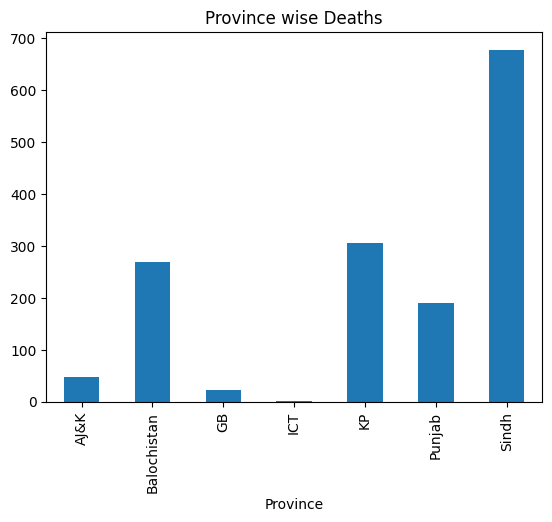

In [20]:
df6_filtered[df6_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Deaths(T)'].max().plot(kind='bar')
plt.title('Province wise Deaths')
plt.savefig('Graphs/Province wise Deaths.png')

#### As seen in this visualization, Flood mostly killed people from 4 major provinces of Pakistan
#### Highest in Sindh, followed by KP, Balochistan and then Punjab
#### There were minor losses in AJ&K, GB and ICT

## Province wise Injuries

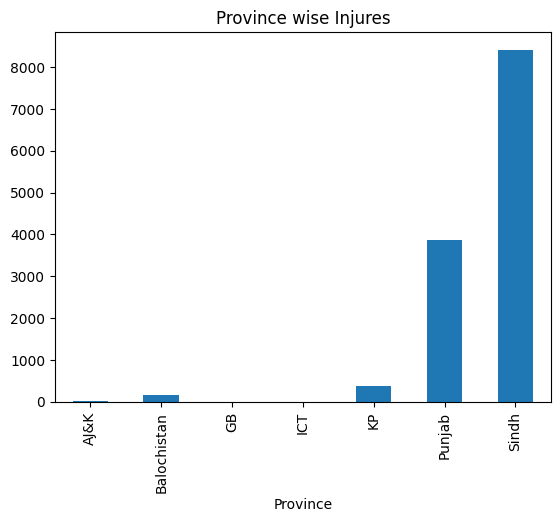

In [19]:
df6_filtered[df6_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Injured(T)'].max().plot(kind='bar')
plt.title('Province wise Injures')
plt.savefig('Graphs/Province wise Injuries.png')

### The trend in injuries is different from that of deaths
### Sindh has highest followed by Punjab
### Balochistan and KP has very low injuries as compare to other 2 major provinces
### No injuries are seen in AJ&K, GB and ICT

## Trend of Deaths with respect to time

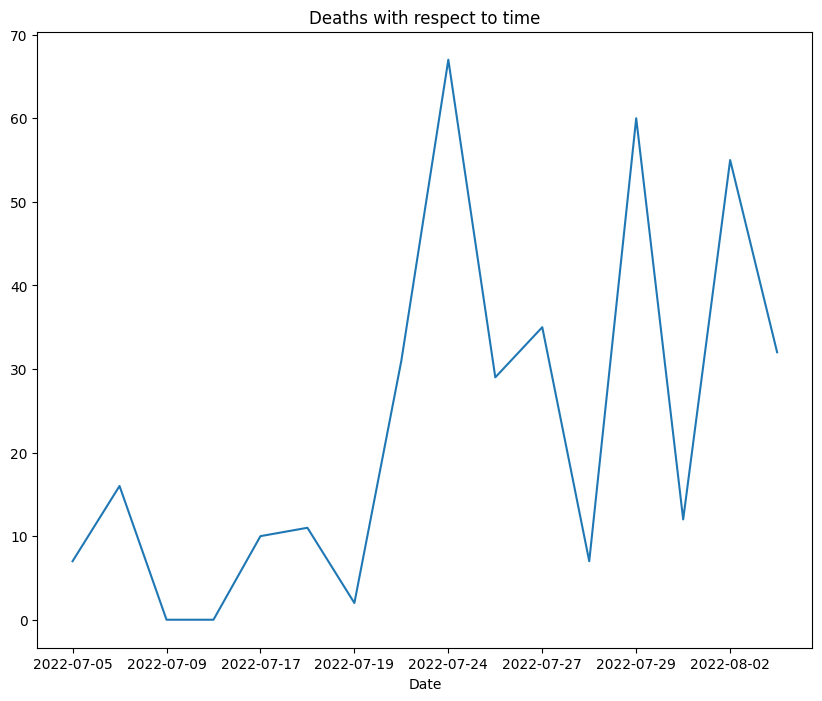

In [18]:
plt.figure(figsize=(10,8))
df6_filtered[df6_filtered['Cumulative?']=='No'].groupby(['Date'])['Deaths(T)'].sum().plot(kind='line')
plt.title('Deaths with respect to time')
plt.savefig('Graphs/Deaths wrt time.png')

### As seen in this line graph, there is no fixed trend as death rate fluctuates with respect to time. But, an overall increase can be observed.

## Correlation between Deaths and Injuries

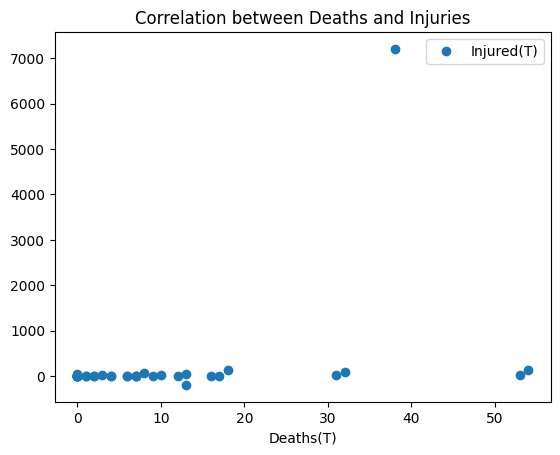

In [15]:
df6_filtered[df6_filtered['Cumulative?']=='No'].plot(x='Deaths(T)', y='Injured(T)', style='o')
np.corrcoef(df6_filtered[df6_filtered['Cumulative?']=='No']['Deaths(T)'],df6_filtered[df6_filtered['Cumulative?']=='No']['Injured(T)'])
plt.title('Correlation between Deaths and Injuries')
plt.savefig('Graphs/Correlation between Deaths and Injuries.png')

### As seen from graph, (also from the calculation) there seems to be negligible correlation between deaths and injuries

## Province wise Deaths (Male/Female seperated)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_6312\1945665444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6_filtered[df6_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Deaths(M)','Deaths(F)'].max().plot(kind="bar",stacked=False)


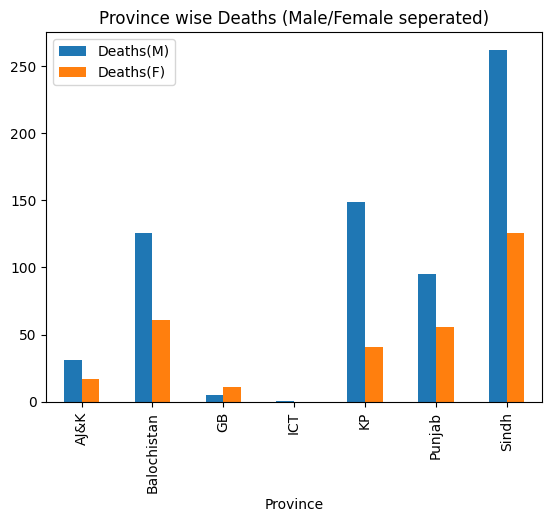

In [5]:
df6_filtered[df6_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Deaths(M)','Deaths(F)'].max().plot(kind="bar",stacked=False)
plt.title('Province wise Deaths (Male/Female seperated)')
plt.savefig('Graphs/Province wise Deaths_(Male_Female seperated).png')

### except for GB, number of deaths of male is higher than female in all territories
### in AJ&K,Balochitan,Punajab and Sindh, death of Males in almost twice that of Female
### in KP, approximately 3 times more Males have died as compared to Females

## Province wise Injuries (Male/Female seperated)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_6312\403303321.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df6_filtered[df6_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Injured(M)','Injured(F)'].max().plot(kind="bar",stacked=False)


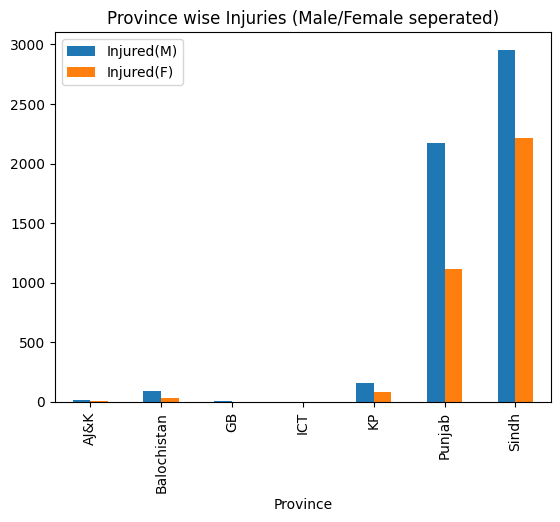

In [6]:
df6_filtered[df6_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Injured(M)','Injured(F)'].max().plot(kind="bar",stacked=False)
plt.title('Province wise Injuries (Male/Female seperated)')
plt.savefig('Graphs/Province wise Injuries(Male_Female seperated).png')

### The injuried people moslty belongs to Punjab and Sindh
### In both provinces, there are more Males injured as compared to Female
### The percentage of Female injured is greater in Sindh as compared to Punjab (the acutal number of Female injured in is even greater than Male injured in Punjab)

## Number of Houses Destroyed(Fully/Partially) in each Province

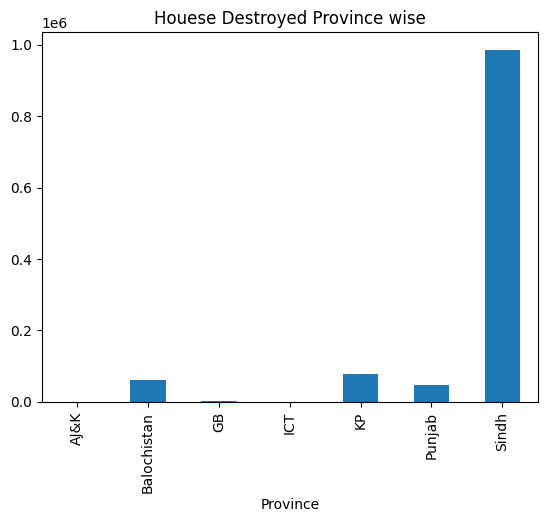

In [12]:
df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Houses(Total)'].max().plot(kind="bar")
plt.title('Houese Destroyed Province wise')
plt.savefig('Graphs/Houese Destroyed Province wise.png')

### Number of houses destroyed in Sindh is way above as compared to any other territory(around 1 milliom)
### Number of houses destroyed in other territories is less than 100,000. Out of these Balochistan, KP and Punjab numbers are significant.

## Number of Houses Destroyed(Fully/Partially) in each Province

C:\Users\Hamza\AppData\Local\Temp\ipykernel_5896\2326852680.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Houses(PD)','Houses(FD)'].max().plot(kind="bar",stacked=False)


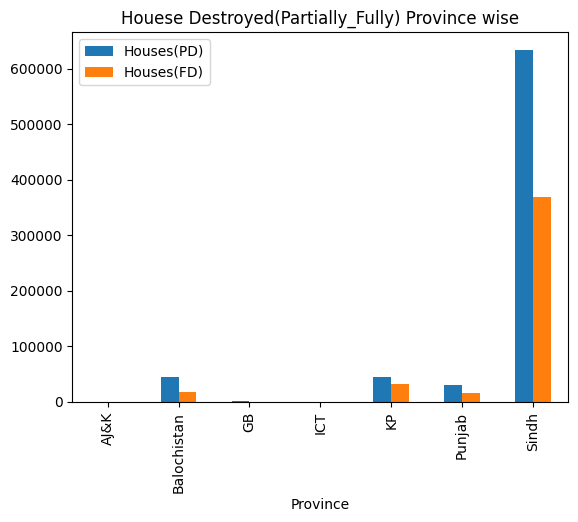

In [11]:
df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Houses(PD)','Houses(FD)'].max().plot(kind="bar",stacked=False)
plt.title('Houese Destroyed(Partially_Fully) Province wise')
plt.savefig('Graphs/Houese Destroyed(Partially_Fully) Province wise.png')

### Number of houses partially destroyed is greater than Number of houses fully destroyed in all cases
### In KP, there seems to be less in difference is houses fully destroyed and houses partially destoryed.

## Number of Roads/Shops/Bridges/Livestock destroyed (Province wise)

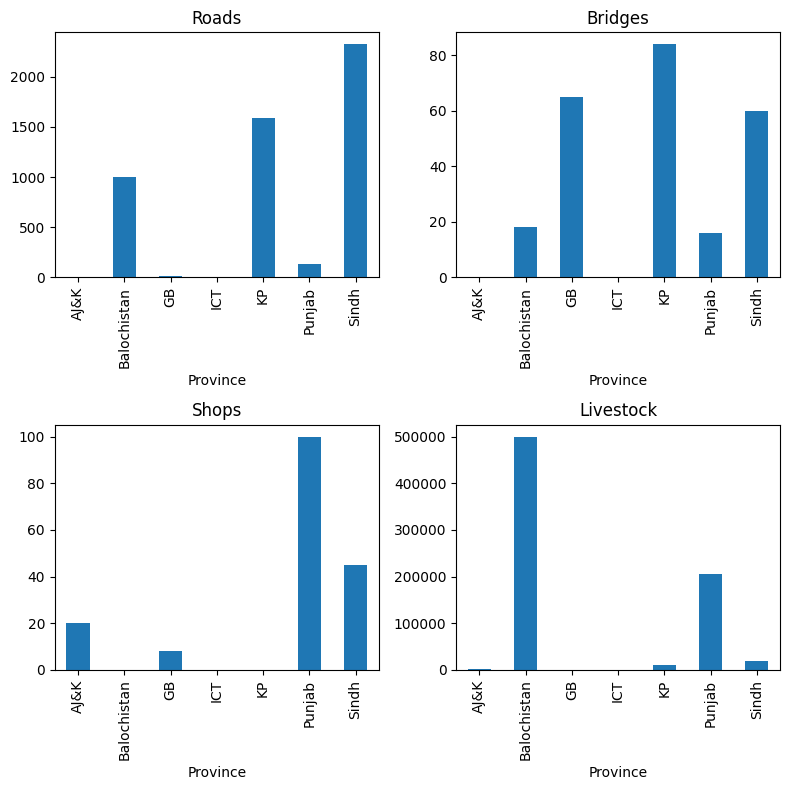

In [10]:
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Roads'].max().plot(kind="bar")
plt.title("Roads")
plt.subplot(2, 2, 2)
df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Bridges'].max().plot(kind="bar")
plt.title("Bridges")
plt.subplot(2, 2, 3)
df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Shops'].max().plot(kind="bar")
plt.title("Shops")
plt.subplot(2, 2, 4)
df7_filtered[df7_filtered['Cumulative?']=='Yes'].groupby(['Province'])['Livestock'].max().plot(kind="bar")
plt.title("Livestock")
plt.tight_layout()
plt.savefig('Graphs/Infrastructure Destroyed.png')
plt.show()


### Which type of infrasture destroyed is more, varies from province to province
### In ICT, no type of infrastructure is destroyed
### In GB, mainly Brigdes are affected (which are greater than 60 in number)
### In AJ&K, around 20 shops are destroyed
### In Balochistan, Livestock (500,000), Roads(1000) and Bridges (less than 20) are destroyed. No shops are destroyed
### In KP, Bridges(80+) are Roads(2000+) are severely are affected
### Sindh and Punjab are only provinces where all types of infrastructure in affected
### In Punjab, Shops and livestock are mainly hit
### In Sindh, Roads, Bridges and Shops are destroyed in great number. The livestock however, not so much

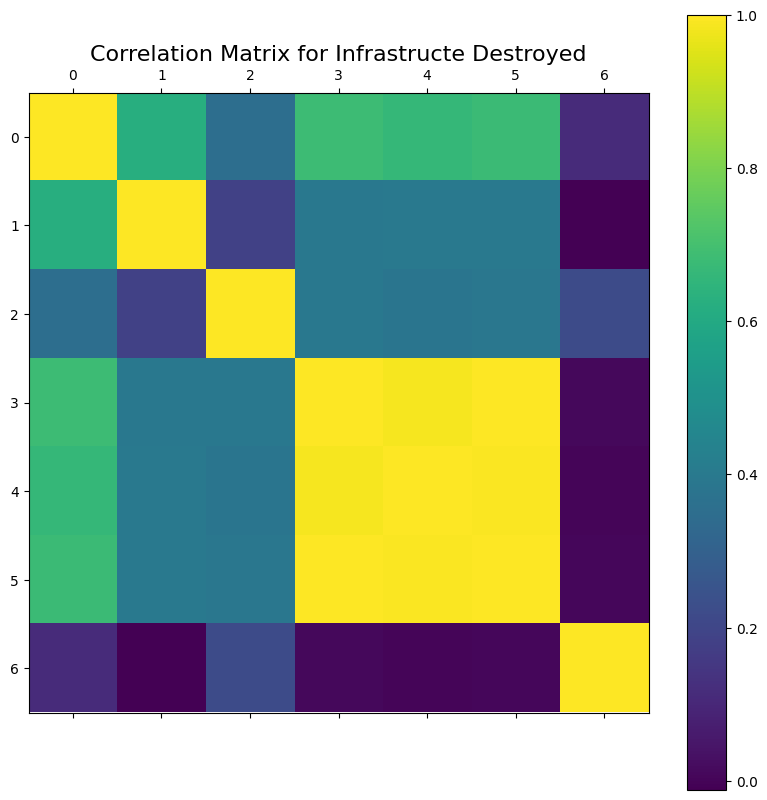

In [21]:
f=plt.figure(figsize=(10,10))
plt.matshow(df7_filtered.corr(), fignum=f.number)
plt.colorbar()
plt.title('Correlation Matrix for Infrastructe Destroyed', fontsize=16)
plt.savefig('Graphs/Correlation Matrix for Infrastructe Destroyed.png')

### There seems to be moderate correlation between Roads destroyed and Bridges or Houses destroyed(partially/fully)
### Houses Partially and Fully destroyed are strongly correlated to one another.

In [163]:
df6_filtered.to_csv('Floods(People).csv')
df7_filtered.to_csv('Floods(infrastructure).csv')

In [2]:
df6_filtered=pd.read_csv('Data/Floods(People).csv',index_col=[0])
df7_filtered=pd.read_csv('Data/Floods(infrastructure).csv',index_col=[0])